<h1>SIMPLE LINEAR REGRESSION UISNG ORDINARY LEAST SQUARES</h1>
<hr>

<p><b>A project by Abhishek Chatterjee</b><br>abhishekchatterjeejit@gmail.com</p>

<h2>INTRODUCTION</h2>
<p>Regression is one of the most important algorithm in the field of machine learning. Regression is used to predict real value output.That means the output of a regression model is continuous.. </p>

<p><b>Mathematical Form : </b><br>
\begin{equation*}
h\theta(x) = \theta_0 + \theta_1.x_1 + \theta_2.x_2 + \theta_3.x_3 + ...
\end{equation*}
<br>
Here $\theta_0, \theta_1, \theta_2$... are called the model coefficients. In the training process, we will optimize these values to make accurate predictions.
<br>
$x_1, x_2, x_3$... are the input values and $h\theta(x)$ is our prediction
</p>

<p><b>Simplifying the Equation : </b><br>
This is our main equation
\begin{equation*}
h\theta(x) = \theta_0 + \theta_1.x_1 + \theta_2.x_2 + \theta_3.x_3 + ...
\end{equation*}
<br>
To simplyfy this equation lets say we add $x_0$ in the equation and set the value of $x_0 = 1$. So the equation is now
\begin{equation*}
h\theta(x) = \theta_0.x_0 + \theta_1.x_1 + \theta_2.x_2 + \theta_3.x_3 + ...
\end{equation*}
<br>
It is clear that the equation is same as earlier.
<br>
Now lets assume a vector $X$. This vector contains all the features. So the vector looks like this<br>
\begin{bmatrix}
x_0\\
x_1\\
x_2\\
\vdots\\
\end{bmatrix}
<br>
Also assume a vector $\theta$. This vector contains all the $\theta$ values ($\theta_0, \theta_1, \theta_2...$). So the vector looks like<br>
\begin{bmatrix}
\theta_0\\
\theta_1\\
\theta_2\\
\vdots\\
\end{bmatrix}
<br>
So we know
\begin{equation*}
h\theta(x) = \theta_0.x_0 + \theta_1.x_1 + \theta_2.x_2 + \theta_3.x_3 + ...
\end{equation*}
<br>
Or we can write
\begin{equation*}
h\theta(x) = \theta^T.X
\end{equation*}
<br>
</p>

<p>In this simple project I'm going to build a regression model using ordinary least squares. The programming language, that I'm going to use in this project is <b>Python 3</b>. Python is a very powerful and popular programming language, especially for machine learning. It provides a ton of libraries that make the whole process of developing the model simple and fast. The libraries that I'm using in this project are <b>numpy, pandas and matplotlib.</b></p>

<p><b>Numpy</b> is a package for scientific calculation in python. It is the library that provides a multidimensional array object, various linear algebra and statistical operations. In this project, I'm going to use numpy for different mathematical calculations and also for storing the data.</p>

<p><b>Pandas</b> is another python package used in machine learning projects. Pandas is an open source, high-performance data structure. Here in this project, I'm going to use it for reading data and storing the data.</p>

<p><b>Matplotlib</b> is a very popular python package for data visualization. Here I'm going to use it for visualizing the data for making better understanding of the data.</p>
<hr>

<h2>DEPENDENCIES</h2>
<p>For this project we need 3 python packages, and these are <b>Numpy, Pandas and Matplotlib.</b>In this part we will add these packages to our project.</p>

In [2]:
#Adding numpy as np
import numpy as np
#Adding pandas as pd
import pandas as pd
#Adding matplotlib as plt
#Pyplot is a part of matplotlib. It provides some basic methods that we are going to use to visualize the data
import matplotlib.pyplot as plt

<h2>COST FUNCTION</h2>
<p>Cost function is function that is used for calculating the error of out model. Here in this project we will use a method called <b>Sum of Squared Errors.</b> It is a very popular method for calculating error for regression model.</p>

<p><b>Mathematical Form : </b>
\begin{equation*}
J(\theta_0, \theta_1 ...) = \frac{1}{2m} \sum_{i=1}^{m} (h\theta(x^i) - y^i)^2
\end{equation*}
<br>
Here $J$ is the cost function and $m$ is the number of samples we have in the dataset
</p>

<p>This is the general formula for calculating cost function. In this project, we will use a modified version of this equation. We will use vectorized method for calculating the cost function. This approach is computationally faster compare to the normal approach. So using the vectorized method we can write the cost as given below.</p>

\begin{equation*}
J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} (\theta^T.X - y)^2
\end{equation*}

In [3]:
#This is the code for the cost function
#Here I'm using the numpy dot method to find the product of the two matrices/vectors
#Also I'm using the numpy sum method to find the sum of the matrix/vector
def cost(X,y,theta):
    return (1/(2*len(X))) * np.sum(((np.dot(X,theta))-y)**2)

<hr>

<h2>OPTIMIZATION FUNCTION</h2>

<p>Optimization function is the that is used to optimize the cost function. In this project we are going to use <b>Gradient Descent</b> optimization method. It is a very powerful and popular method for optimizing cost functions.</p>

<p><b>Mathematical Form :</b>

\begin{equation*}
\theta_j := \theta_j - \alpha\frac{\partial}{\partial\theta_j} J(\theta_0, \theta_1, ...)
\end{equation*}
<br>
Here $j=0,1,2...$ and $\alpha$ is the learninig rate
<br>
By solving the equation, we get
\begin{equation*}
\theta_0 := \theta_0 - \alpha\frac{1}{m}\sum_{i=1}^{m}[h\theta(x^i)-y^i]
\end{equation*}
and
\begin{equation*}
\theta_1 := \theta_1 - \alpha\frac{1}{m}\sum_{i=1}^{m}[h\theta(x^i)-y^i]X^i
\end{equation*}
...
<br>
Or using the vectorized implementation, we can write it as 
\begin{equation*}
\theta_j := \theta_j - \alpha\frac{1}{m}\sum_{i=1}^{m}[\theta^T.X-y]X_j
\end{equation*}
</p>

In [4]:
#This is the optimize function
#Here max_iter is the number of iterations and alpha is the learning rate
def optimize(X,y,theta,max_iter,alpha):
    for i in range(max_iter):
        A = np.subtract(np.dot(X,theta),y)
        delta = (1/len(X)) * (np.transpose(np.dot(np.transpose(A),X)))
        theta = theta - (alpha * delta)
    return theta

<h2>VISUALIZATION OF THE DATA</h2>
<p>In this part, we will visualize the data using matplotlib</p>

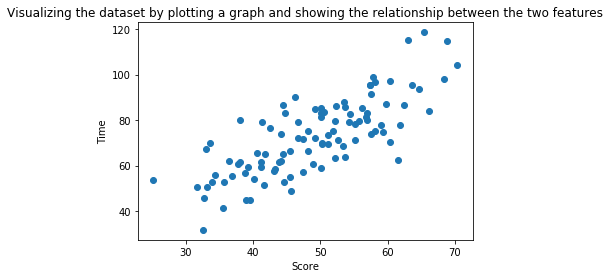

In [17]:
#Here I'm using the read_csv method privided with pandas
#This method is used in read csv files
data = pd.read_csv('data.csv')

#Here I'm splitting the data into two sepatate vectors
X = data['time']
y = data['score']

#Here I'm using matplotlib to print a graph showing the realationship between X and y
plt.scatter(X,y)
plt.title("Visualizing the dataset by plotting a graph and showing the relationship between the two features")
plt.xlabel("Score")
plt.ylabel("Time")
plt.show()

<h2>REGRESSION</h2>
<p>In this part, we will use the methods to do the regression</p>

In [18]:
#Converting it into a pandas dataframe
X = X.to_frame()

#Inserting a column in the features
#Remember when we are simplyfing the hypothesis equation, we add a new feature X0 and we set its value to 1 always
#That is why we add a new value with a default value 1
X.insert(0,'sample', value=1)

#Here we are converting the pandas dataframe to a numpy array
X = X.values
y = y.values

#Here we are rehaping y
y = np.reshape(y, (100,1))

#Initializing theta with value 0
theta = np.array([[0],[0]])

#Calling all methods and saving the values in variables
initailCost = cost(X,y,theta)
theta = optimize(X,y,theta,1000,0.0001)
finalCost = cost(X,y,theta)

In [20]:
#Here we are printing the values
print("Initially the cost was {initialCost}".format(initialCost=initailCost))
print("After training the model, the new cost is {finalCost} and the new value of theta is {theta}".format(finalCost=finalCost,theta=theta))

Initially the cost was 2782.553917241607
After training the model, the new cost is 56.3163353935547 and the new value of theta is [[ 0.05905856]
 [ 1.47833133]]
